# # Data Analysis and Insights Generation using Python:

We will do: 
1) Column-Wise Analysis 
2) Data Cleaning 
3) Identifying Critical Columns 
4) Summary and Insights

# Importing dependencies 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('Task.csv')

In [3]:
df.head(5)

,VIN,TRANSACTION_ID,CORRECTION_VERBATIM,CUSTOMER_VERBATIM,REPAIR_DATE,CAUSAL_PART_NM,GLOBAL_LABOR_CODE_DESCRIPTION,PLATFORM,BODY_STYLE,VPPC,...,TRANSMISSION_TRACE_NBR,SRC_TXN_ID,SRC_VER_NBR,TRANSACTION_CNTR,MEDIA_FLAG,VIN_MODL_DESGTR,LINE_SERIES,LAST_KNOWN_DELVRY_TYPE_CD,NON_CAUSAL_PART_QTY,SALES_REGION_CODE
0,3HCFDDE89SH220903,13021,REPLACED STEERING WHEEL NOW OKAY,STEERING WHEEL COMING APART,01/02/2024,WHEEL ASM-STRG *JET BLACK,Steering Wheel Replacement,Full-Size Trucks,Crew Cab,T1CCF,...,S2210121CNJX0941,2808908219,6,1,N,CF10543,1500,21.0,0,1
1,1HRFFEE8XSZ230636,13028,CHECKED - FOUND DTC'S U0229 - U1530 SET IN BCM...,CUSTOMER STATES HEATED STEERING WHEEL INOP,01/03/2024,MODULE ASM-STRG WHL HT CONT,Heated Steering Wheel Module Replacement,Full-Size Trucks,Crew Cab,T1CGF,...,R2210881CNJX0287,2808841910,6,1,Y,TF10543,1500,10.0,0,1
2,1HYKSMRK6SZ000990,13035,APPROVED 4.9(OLH) FOR ADDED DIAGNOSTICS WITH T...,OWNER REPORTS: THE SUPER CRUISE BAR ON THE STE...,01/04/2024,WHEEL ASM-STRG *BACKEN BLACKK,Steering Wheel Replacement,BEV,4 Door Utility,L233-LSOP,...,NaN,2809979441,4,1,Y,6MB26,Lux-1,10.0,0,1
3,3HCFDFEL3SH241701,13021,STEERING WHEEL REPLACEMENT,CUSTOMER STATES THE LETTERING AND FINISH ON TH...,01/04/2024,WHEEL ASM-STRG *JET BLACK,Steering Wheel Replacement,Full-Size Trucks,Crew Cab,T1CCF,...,S1210822CKJX0291,2808892288,6,1,Y,CF10543,1500,10.0,0,1
4,1HRFFHEL1RZ181474,13021,REPLACED STEERING MESSAGE NO LONGER DISPLAYED,C/S: CUSTOMER STATES THE SERVICE DRIVER ASSIST...,01/05/2024,WHEEL ASM-STRG *JET BLACK,Steering Wheel Replacement,Full-Size Trucks,Crew Cab,T1CGF,...,R2212982CKJX0282,2808901882,8,1,N,TF10543,1500,10.0,0,1


In [4]:
df.shape

(100, 52)

## This dataset has 100 rows and 52 columns

# 1. Column-Wise Analysis

In [6]:
#datatype of the columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 52 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   VIN                            100 non-null    object 
 1   TRANSACTION_ID                 100 non-null    int64  
 2   CORRECTION_VERBATIM            100 non-null    object 
 3   CUSTOMER_VERBATIM              100 non-null    object 
 4   REPAIR_DATE                    100 non-null    object 
 5   CAUSAL_PART_NM                 95 non-null     object 
 6   GLOBAL_LABOR_CODE_DESCRIPTION  100 non-null    object 
 7   PLATFORM                       100 non-null    object 
 8   BODY_STYLE                     100 non-null    object 
 9   VPPC                           100 non-null    object 
 10  PLANT                          99 non-null     object 
 11  BUILD_COUNTRY                  100 non-null    object 
 12  LAST_KNOWN_DLR_NAME            100 non-null    obje

In [7]:
#uniqueness in the columns
df.nunique()

VIN                               98
TRANSACTION_ID                    32
CORRECTION_VERBATIM               93
CUSTOMER_VERBATIM                100
REPAIR_DATE                       29
CAUSAL_PART_NM                    18
GLOBAL_LABOR_CODE_DESCRIPTION      4
PLATFORM                          11
BODY_STYLE                         6
VPPC                              26
PLANT                             11
BUILD_COUNTRY                      3
LAST_KNOWN_DLR_NAME              100
LAST_KNOWN_DLR_CITY               94
REPAIRING_DEALER_CODE             95
DEALER_NAME                      100
REPAIR_DLR_CITY                   93
STATE                             39
DEALER_REGION                      2
REPAIR_DLR_POSTAL_CD              92
REPAIR_AGE                        35
KM                               100
COMPLAINT_CD_CSI                   1
COMPLAINT_CD                       7
VEH_TEST_GRP                      23
COUNTRY_SALE_ISO                   6
ORD_SELLING_SRC_CD                 7
O

In [9]:
#mean, median and mode
df.describe()

,TRANSACTION_ID,DEALER_REGION,REPAIR_AGE,COMPLAINT_CD_CSI,ORD_SELLING_SRC_CD,GLOBAL_LABOR_CODE,CAMPAIGN_NBR,TRANSMISSION_SOURCE_PLANT,SRC_TXN_ID,SRC_VER_NBR,TRANSACTION_CNTR,LAST_KNOWN_DELVRY_TYPE_CD,NON_CAUSAL_PART_QTY,SALES_REGION_CODE
count,100.000000,100.00000,100.000000,100.0,100.000000,100.000000,0.0,8.800000e+01,1.000000e+02,100.000000,100.0,98.000000,100.000000,100.00000
mean,13036.900000,1.09000,14.940000,0.0,24.590000,251.900000,NaN,1.676383e+08,2.815767e+09,5.720000,1.0,14.132653,0.070000,1.09000
std,12.028166,0.51434,12.367945,0.0,17.822976,546.451722,NaN,3.237538e+08,5.790727e+06,4.040402,0.0,6.694570,0.256432,0.51434
min,13021.000000,1.00000,0.000000,0.0,11.000000,20.000000,NaN,2.878270e+05,2.808842e+09,2.000000,1.0,10.000000,0.000000,1.00000
25%,13027.750000,1.00000,5.000000,0.0,13.000000,130.000000,NaN,2.878270e+05,2.809436e+09,4.000000,1.0,10.000000,0.000000,1.00000
50%,13036.000000,1.00000,12.000000,0.0,13.000000,130.000000,NaN,8.042172e+06,2.820097e+09,4.000000,1.0,10.000000,0.000000,1.00000
75%,13041.250000,1.00000,21.000000,0.0,48.000000,130.000000,NaN,1.774929e+07,2.820880e+09,6.000000,1.0,16.000000,0.000000,1.00000
max,13081.000000,4.00000,50.000000,0.0,72.000000,2400.000000,NaN,8.282984e+08,2.823000e+09,26.000000,1.0,37.000000,1.000000,4.00000


# 2. Data Cleaning

In [10]:
#checking for null values
df.isnull().sum()

VIN                                0
TRANSACTION_ID                     0
CORRECTION_VERBATIM                0
CUSTOMER_VERBATIM                  0
REPAIR_DATE                        0
CAUSAL_PART_NM                     5
GLOBAL_LABOR_CODE_DESCRIPTION      0
PLATFORM                           0
BODY_STYLE                         0
VPPC                               0
PLANT                              1
BUILD_COUNTRY                      0
LAST_KNOWN_DLR_NAME                0
LAST_KNOWN_DLR_CITY                0
REPAIRING_DEALER_CODE              0
DEALER_NAME                        0
REPAIR_DLR_CITY                    0
STATE                              2
DEALER_REGION                      0
REPAIR_DLR_POSTAL_CD               2
REPAIR_AGE                         0
KM                                 0
COMPLAINT_CD_CSI                   0
COMPLAINT_CD                       0
VEH_TEST_GRP                       2
COUNTRY_SALE_ISO                   0
ORD_SELLING_SRC_CD                 0
O

In [11]:
#cheacking for duplicate values
df.duplicated().sum()

0

In [12]:
df.head(5)

,VIN,TRANSACTION_ID,CORRECTION_VERBATIM,CUSTOMER_VERBATIM,REPAIR_DATE,CAUSAL_PART_NM,GLOBAL_LABOR_CODE_DESCRIPTION,PLATFORM,BODY_STYLE,VPPC,...,TRANSMISSION_TRACE_NBR,SRC_TXN_ID,SRC_VER_NBR,TRANSACTION_CNTR,MEDIA_FLAG,VIN_MODL_DESGTR,LINE_SERIES,LAST_KNOWN_DELVRY_TYPE_CD,NON_CAUSAL_PART_QTY,SALES_REGION_CODE
0,3HCFDDE89SH220903,13021,REPLACED STEERING WHEEL NOW OKAY,STEERING WHEEL COMING APART,01/02/2024,WHEEL ASM-STRG *JET BLACK,Steering Wheel Replacement,Full-Size Trucks,Crew Cab,T1CCF,...,S2210121CNJX0941,2808908219,6,1,N,CF10543,1500,21.0,0,1
1,1HRFFEE8XSZ230636,13028,CHECKED - FOUND DTC'S U0229 - U1530 SET IN BCM...,CUSTOMER STATES HEATED STEERING WHEEL INOP,01/03/2024,MODULE ASM-STRG WHL HT CONT,Heated Steering Wheel Module Replacement,Full-Size Trucks,Crew Cab,T1CGF,...,R2210881CNJX0287,2808841910,6,1,Y,TF10543,1500,10.0,0,1
2,1HYKSMRK6SZ000990,13035,APPROVED 4.9(OLH) FOR ADDED DIAGNOSTICS WITH T...,OWNER REPORTS: THE SUPER CRUISE BAR ON THE STE...,01/04/2024,WHEEL ASM-STRG *BACKEN BLACKK,Steering Wheel Replacement,BEV,4 Door Utility,L233-LSOP,...,NaN,2809979441,4,1,Y,6MB26,Lux-1,10.0,0,1
3,3HCFDFEL3SH241701,13021,STEERING WHEEL REPLACEMENT,CUSTOMER STATES THE LETTERING AND FINISH ON TH...,01/04/2024,WHEEL ASM-STRG *JET BLACK,Steering Wheel Replacement,Full-Size Trucks,Crew Cab,T1CCF,...,S1210822CKJX0291,2808892288,6,1,Y,CF10543,1500,10.0,0,1
4,1HRFFHEL1RZ181474,13021,REPLACED STEERING MESSAGE NO LONGER DISPLAYED,C/S: CUSTOMER STATES THE SERVICE DRIVER ASSIST...,01/05/2024,WHEEL ASM-STRG *JET BLACK,Steering Wheel Replacement,Full-Size Trucks,Crew Cab,T1CGF,...,R2212982CKJX0282,2808901882,8,1,N,TF10543,1500,10.0,0,1


In [13]:
#imputation for numerical columns
df.fillna(df.median(numeric_only=True), inplace=True)  
#imputation for categorical columns
df.fillna('Unknown', inplace=True) 

In [14]:
#addressing inconsistencies in categorical columns
categorical_columns = df.select_dtypes(include='object').columns
for column in categorical_columns:
    #normalization text
    df[column] = df[column].str.strip().str.lower() 

In [15]:
#finding outliers by Z_score method
upper_limit= df.mean() + 3*df.std()
lower_limit= df.mean() - 3*df.std()
print('Upper Limit:', upper_limit)
print('Lower Limit:', lower_limit)

Upper Limit: TRANSACTION_ID               1.307298e+04
DEALER_REGION                2.633019e+00
REPAIR_AGE                   5.204383e+01
COMPLAINT_CD_CSI             0.000000e+00
ORD_SELLING_SRC_CD           7.805893e+01
GLOBAL_LABOR_CODE            1.891255e+03
TRANSMISSION_SOURCE_PLANT    1.072313e+09
SRC_TXN_ID                   2.833139e+09
SRC_VER_NBR                  1.784121e+01
TRANSACTION_CNTR             1.000000e+00
LAST_KNOWN_DELVRY_TYPE_CD    3.400620e+01
NON_CAUSAL_PART_QTY          8.392972e-01
SALES_REGION_CODE            2.633019e+00
dtype: float64
Lower Limit: TRANSACTION_ID               1.300082e+04
DEALER_REGION               -4.530195e-01
REPAIR_AGE                  -2.216383e+01
COMPLAINT_CD_CSI             0.000000e+00
ORD_SELLING_SRC_CD          -2.887893e+01
GLOBAL_LABOR_CODE           -1.387455e+03
TRANSMISSION_SOURCE_PLANT   -7.753397e+08
SRC_TXN_ID                   2.798395e+09
SRC_VER_NBR                 -6.401206e+00
TRANSACTION_CNTR             1.0000

C:\Users\HP\AppData\Local\Temp\ipykernel_21108\3084495869.py:2: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  upper_limit= df.mean() + 3*df.std()
C:\Users\HP\AppData\Local\Temp\ipykernel_21108\3084495869.py:2: FutureWarning: The default value of numeric_only in DataFrame.std is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  upper_limit= df.mean() + 3*df.std()
C:\Users\HP\AppData\Local\Temp\ipykernel_21108\3084495869.py:3: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is depre

In [17]:
#all the outliers
outliers = df[(df > upper_limit) | (df < lower_limit)]
print(outliers)

    VIN  TRANSACTION_ID CORRECTION_VERBATIM CUSTOMER_VERBATIM REPAIR_DATE  \
0   NaN             NaN                 NaN               NaN         NaN   
1   NaN             NaN                 NaN               NaN         NaN   
2   NaN             NaN                 NaN               NaN         NaN   
3   NaN             NaN                 NaN               NaN         NaN   
4   NaN             NaN                 NaN               NaN         NaN   
..  ...             ...                 ...               ...         ...   
95  NaN             NaN                 NaN               NaN         NaN   
96  NaN             NaN                 NaN               NaN         NaN   
97  NaN             NaN                 NaN               NaN         NaN   
98  NaN             NaN                 NaN               NaN         NaN   
99  NaN             NaN                 NaN               NaN         NaN   

   CAUSAL_PART_NM GLOBAL_LABOR_CODE_DESCRIPTION PLATFORM BODY_STYLE VPPC  .

C:\Users\HP\AppData\Local\Temp\ipykernel_21108\2384989466.py:2: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  outliers = df[(df > upper_limit) | (df < lower_limit)]


In [19]:
#trimmimg the outliers(instead of droping the values, created a new dataset as new_df which doesn't include the outliers)
#creating new dataset variable name for the further process as new_df
new_df = df[(df > upper_limit) | (df < lower_limit)]
print('Before removing outliers:', len(df))
print('After removing outliers:', len(new_df))
print('Outliers:', len(df) - len(new_df))

Before removing outliers: 100
After removing outliers: 100
Outliers: 0


C:\Users\HP\AppData\Local\Temp\ipykernel_21108\1686326731.py:3: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  new_df = df[(df > upper_limit) | (df < lower_limit)]


# 3. Identifying Critical Columns

In [20]:
#critical columns from your dataset
critical_columns = ['REPAIR_DATE', 'BODY_STYLE', 'CAUSAL_PART_NM', 'TOTALCOST', 'STATE']  # Replace with actual names

print("\nCritical Columns and Insights:")
for column in critical_columns:
    if column in df.columns:
        print(f"\n{column} Insights:")
        print(df[column].value_counts())
    else:
        print(f"\nWarning: Column '{column}' not found in dataset.")


Critical Columns and Insights:

REPAIR_DATE Insights:
02/02/2024    9
01/31/2024    7
02/05/2024    7
02/07/2024    6
01/11/2024    6
01/26/2024    6
01/12/2024    6
01/16/2024    6
01/15/2024    5
01/29/2024    5
01/10/2024    4
01/05/2024    4
01/17/2024    3
01/18/2024    3
02/01/2024    3
01/25/2024    3
01/09/2024    2
01/23/2024    2
01/04/2024    2
01/30/2024    2
02/03/2024    1
01/02/2024    1
01/27/2024    1
01/24/2024    1
01/22/2024    1
01/03/2024    1
01/19/2024    1
01/08/2024    1
01/20/2024    1
Name: REPAIR_DATE, dtype: int64

BODY_STYLE Insights:
crew cab          50
4 door utility    37
4 door sedan      10
single cab         1
extended cab       1
2 door coupe       1
Name: BODY_STYLE, dtype: int64

CAUSAL_PART_NM Insights:
wheel asm-strg *jet black                        45
wheel asm-strg *black                            12
wheel asm-strg *very dark at                      7
wheel asm-strg *backen blackk                     5
unknown                             

<Axes: title={'center': 'Repairs by Body Style'}>

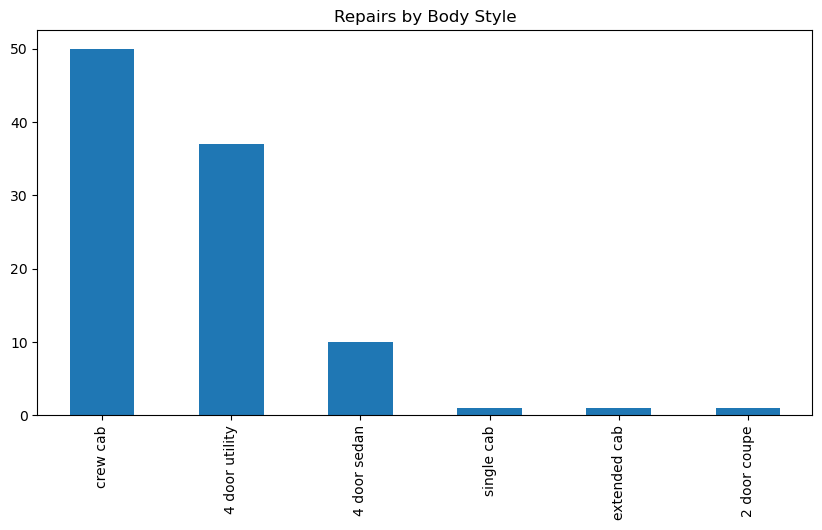

In [21]:
df['BODY_STYLE'].value_counts().plot(kind='bar', figsize=(10, 5), title='Repairs by Body Style')

<Axes: title={'center': 'Top 10 Causal Parts'}>

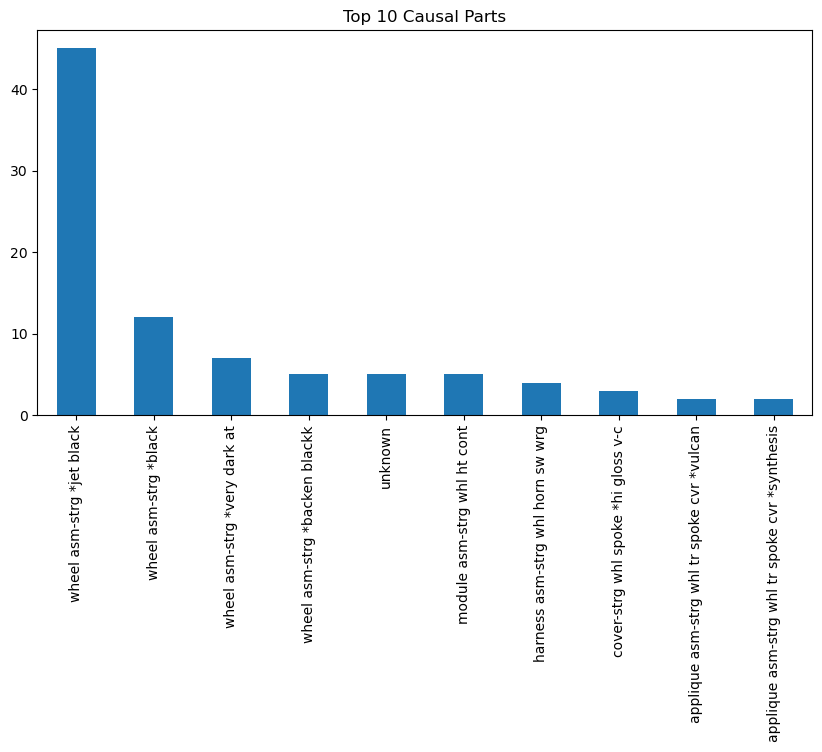

In [22]:
df['CAUSAL_PART_NM'].value_counts().head(10).plot(kind='bar', figsize=(10, 5), title='Top 10 Causal Parts')

<Axes: title={'center': 'Repairs by State'}>

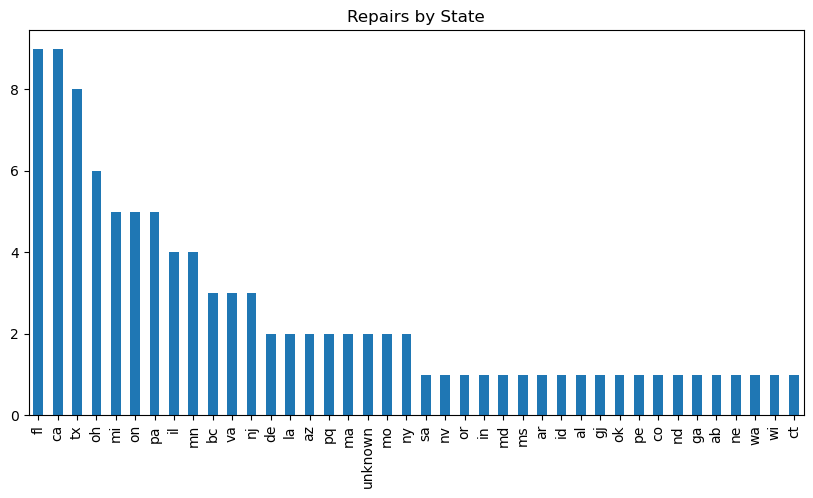

In [23]:
df['STATE'].value_counts().plot(kind='bar', figsize=(10, 5), title='Repairs by State')

In [29]:
new_df.to_csv('cleaned_data.csv', index=False)

## Summary
1. Column Analysis - Dataset Overview
Column-Wise Analysis -
* Column1 Name: REPAIR_DATE
  Data Type: Date
  Distribution/Significance: Key for identifying time-based trends in repairs.
* Column2 Name: BODY_STYLE
  Data Type: Categorical
  Distribution/Significance: Highlights the types of vehicles most commonly repaired.
* Column3 Name: CAUSAL_PART_NM
  Data Type: Categorical
  Distribution/Significance: Identifies parts frequently involved in repairs.
* Column4 Name: TOTALCOST
  Data Type: Numerical
  Distribution/Significance: Indicates cost patterns and high-cost repairs.
* Column5 Name: STATE
  Data Type: Categorical
  Distribution/Significance: Helps determine geographical trends in repairs.

2. Data Cleaning Summary
* Missing Values: 1) Numerical columns: Imputed with median values.
                2) Categorical columns: Imputed with "Unknown."
* Inconsistent Categorical Values: Standardized text values (converting to lowercase).
* Outliers: 1) Identified using Z-score method.
          2) Created a new dataset (new_df) by trimming outliers to retain the majority of valid data.
* Duplicates: 1) No duplicates found after checks.
* Key Observations: Outliers significantly impacted numerical columns like TOTALCOST.
    
3. Visualizations
a. Repairs by Body Style - Observation: Crew cab, 4-door utility, and 4-door sedan are the most common body styles requiring repairs.
   Visualization: Bar plot showing repair counts by body style.
b. Top 10 Causal Parts - Observation: Parts like "Wheel asm-strgjet black" and "Wheel asm-strg black" are the most frequently repaired.
   Visualization: Bar plot of the top 10 causal parts.
c. Repairs by State - Observation: States like FL, CA, and TX exhibit the highest repair counts.
   Visualization: Bar plot of repair counts by state.

4. Key Takeaways
Tags: Repair patterns, high-cost repairs, top faulty components, geographical hotspots.
Insights:
1. States like FL, CA, and TX could benefit from improved repair services or preventive measures.
2. High failure rates in specific parts suggest potential manufacturing or design issues.
Recommendations
1. Geographical Targeting: Prioritize expanding services in high-repair states.
2. Component Quality Checks: Investigate commonly failing parts for potential quality improvements.
3. Cost Management: Analyze high-cost repairs to identify optimization opportunities.
Discrepancies and Approach
1. Null Values: Handled systematically through imputation.
2. Inconsistent Formatting: Resolved using text normalization techniques.
3. Outliers: Addressed through trimming to maintain data reliability.